# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Tutorial/HW 6: Simulating RC circuits (30 points total)

## Tutorial/HW summary
- Setting up the RC circuit with different initial conditions (with/without a battery)
- Solving a more complex circuit

In [10]:
import numpy as np
from matplotlib import pyplot as plt

## RC circuit to model

We will model an RC circuit with the analogous steps as the `Spring` from the preflight.  Here, we will examine the behavior of:

- Case 1: An uncharged capacitor in series with a resistor and a battery that will be charged from the battery.  
- Case 2: A discharging capacitor as current flows through a resistor after the battery has been disconnected and the circuit closed.

In the first case, the inital voltage across the capacitor is then zero, and the initial current through the resistor will be $I = \frac {V_b} {R}$ where $V_b$ is the voltage of the battery.  The schematic is below:

<img src="http://www-personal.umich.edu/~gerdes/img/MC-PythonCircuit02.png" height="400" width="400">


We can write down the differential equation which includes this initial condition, and solve numerically.  Plot the current through the resistor and the charge on the capacitor as a function of time.  Following this, we can compute and plot the power delivered by the battery to the circuit as a function of time.  We can also compute the total energy delivered by the battery to the circuit, compare this to the energy stored in the capacitor energy dissipated as heat in the resistor? 

For the first set up, we will keep the loop rule in mind,
\begin{eqnarray}
V - IR - Q/C = 0
\end{eqnarray}


### Practice writing equations in latex (3 points - 7 min)
In the cell below, write: 
- the current at the ith timestep, $I_i=\frac{\Delta Q_i}{\Delta t}$, in terms of everything else (you'll need to rearrange the loop rule), and 
- the charge on the capacitor at the next timestep, $Q_{i+1}$, in terms of $Q_{i}$, where $Q_{i}$ is the charge on the capacitor at the ith timestep (which determines the current at the ith timestep). 
- the current in the i+1 timestep, $I_{i+1}$, given the new charge, $Q_{i+1}$, on the capacitor.

\begin{eqnarray}
I_i & = &(V - Q_i/C)/R
\end{eqnarray}

\begin{eqnarray}
Q_{i+1} &=& Q_i+I_i dt \\
&=& Q_i + (V- Q_i/C)/R
\end{eqnarray}

\begin{eqnarray}
I_{i+1} &=& (V - Q_{i+1}/C)/R
\end{eqnarray}

## Build a class to model the RC circuit (2 points)

Below, we have a class to model the RC circuit.  
- Fill out the internal method, `self._set_i_now` to set the attribute `self.i_now` to the appropriate value dependent on other attributes.
- Use the internal method where needed.

In [11]:
class RCCircuit :
    """Creates an instance of an rc circuit model, which can be time evolved"""
    def __init__(self, resistance, capacitance, q_capacitor, voltage_battery) :
        """A model of an rc circuit
        Parameters
        ----------
        resistance : float
            value of resistance in ohms
        capacitance : float 
            value of capacitance in Farads
        q_capacitor : float
            initial charge on capacitor
        voltage_battery : float
            voltage across battery
        """

        self.resistance = resistance
        self.capacitance = capacitance
        
        # The time constant is a characteristic timescale of the system, analogous to the period in a spring
        self.rc_constant = resistance * capacitance
        
        self.voltage_battery = voltage_battery
        self.q_now = q_capacitor
        
        #  Use the internal method _set_i_now
        ### BEGIN SOLUTION
        self._set_i_now()
        ### END SOLUTION
        
        self.i_vals = []
        self.q_vals = []

    def _set_i_now(self) :
        """Calculate current for attribute i_now in terms of other attributes"""
        ### BEGIN SOLUTION
        self.i_now = (self.voltage_battery - self.q_now/self.capacitance)/self.resistance
        ### END SOLUTION
        
    def _set_num_timesteps(self, num_timescales, num_timesteps_per_timescale) :        
        """Internal method. Sets the attributes num_timesteps and dt.
        Parameters
        ----------
        num_timescales : floattimestep 
            number of timescales to evolve over
        num_timesteps_per_timescale : int
            number of timesteps per characteristic timescale, defines the time resolution 
        """
        
        dt = self.rc_constant / num_timesteps_per_timescale

        try :
            if self.dt != dt :
                # self.dt already exists, using evolve_spring with a different one
                print("Warning: you are continuing with a different timestep")
                print("previous dt=%.4f"%self.dt)
                print("new dt=%.4f"%dt)
                self.dt = dt
        except AttributeError :
            # Define the attribute dt for the first time
            self.dt = dt    
        
        self.num_timesteps = num_timescales * num_timesteps_per_timescale
        
    def evolve_circuit(self, num_timescales, num_timesteps_per_timescale) :
        """Evolve the spring, populate the acceleration, velocity and position (a_vals, v_vals, x_vals)
        Parameters
        ----------
        num_periods : float
            number of periods to evolve over
        num_timesteps_per_period : int
            number of timesteps per period, defines the time resolution         
        """
        
        self._set_num_timesteps(num_timescales, num_timesteps_per_timescale)
        
        for timestep in np.arange(self.num_timesteps) :
            # Populate i_vals and q_vals with current current and charge on capacitor
            self.i_vals.append(self.i_now)
            self.q_vals.append(self.q_now)
            
            # Update "now" values: q_now, and i_now (i_now can be updated with a method)
            self.q_now += self.i_now * self.dt 
            ### BEGIN SOLUTION
            self._set_i_now()
            ### END SOLUTION

In [12]:
"""Execute to check you're on the right track"""
test_rcc = RCCircuit(1,1e-6,0,10)
assert(test_rcc.i_now == 10)
test_rcc.evolve_circuit(10,100)
assert(test_rcc.i_now < 1e-3)
### BEGIN HIDDEN TESTS
assert((test_rcc.i_vals[int(len(test_rcc.i_vals)/2)]-0.657) < 1e-3)
### END HIDDEN TESTS

**Discussion** (5 min): Food for thought -- you'll notice that the class has two lines that call the `self._set_i_now` method.  Can you identify where you might place a *single call* of `self._set_i_now` instead such that everything works?  Write out some takeaways from the discussion below (2 points).

With two calls, you set `i_now` in the same places that you set `q_now`, and you have this attribute defined upon initialization. Alternatively, you can put the call just before you append to `i_vals`, so there is a value to append.

### Model the charging capacitor in an RC circuit (2 points -- in class)

In the cell below, 
- Define an instance of `RCCircuit` that corresponds to an RC circuit with the following initial conditions $R = 2\Omega$, $C = 20e-06$ Farad, $V_b=5$V, $Q_0=0$.  An appropriate name for this instance would be `rcc`.  
- Evolve the system over 5$\tau$ (i.e. $5 RC$), where $\tau$ is the relevant timescale with 1000 steps per $\tau$.

In [13]:
# Define charging_rc_circuit here and evolve
### BEGIN SOLUTION
rcc = RCCircuit(2, 20e-6, 0, 5)
rcc.evolve_circuit(5, 1000)
### END SOLUTION

In [14]:
"""Execute to check you're on the right track"""
assert('i_vals' in dir(rcc))
assert(rcc.dt == 4e-8)

### Calculate the power (2 points -- 5 min group work)
- Calculate the power output by the battery at each timestep, p_vals_battery
- Calculate the power dissipated by the resistor at each timestep, p_vals_resistor

Each of these depend on the attribute `i_vals`, which is a list of the current at each timestep.  You can either create an array from this list (recommended), or use a list comprehension if you want to practice this (and the power at each timestep would be a list).

In [15]:
# Calculate the power here
### BEGIN SOLUTION
p_vals_battery = rcc.voltage_battery * np.array(rcc.i_vals)
p_vals_resistor = rcc.resistance * np.array(rcc.i_vals)**2
### END SOLUTION
p_vals_battery.sum()
p_vals_resistor.sum()

6252.844088631959

In [16]:
"""Execute to check you're on the right track"""
if type(p_vals_battery) == list :
    assert(np.array(p_vals_battery).sum() - 12415 < 1)
else :
    assert(p_vals_battery.sum() - 12415 < 1)

if type(p_vals_resistor) == list :
    assert(np.array(p_vals_resistor).sum() - 6252 < 1)
else :
    assert(p_vals_resistor.sum() - 6252 < 1)

### Plot the charge, current, and power delivered by the battery (2 points -- 5 min group work)

Below is most of the code to make a 3 panel plot of charge, current, and battery power as a function of time.  
- Fill in the appropriate code to calculate the time in units of $\tau=RC$ (analogous to time in units of the period T from the preflight), `time_rc_units`.  
- Define yarrays with the appropriate lists/numpy arrays to make the described 3 panel plot.

Text(0.5,0,'Time in units of RC')

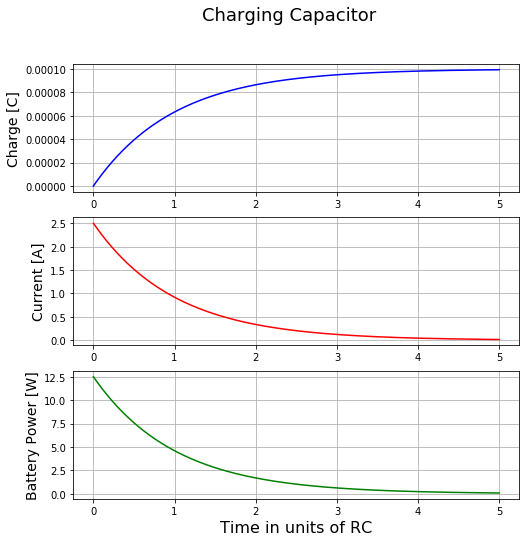

In [17]:
#  Plotting code here
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,8))
fig.suptitle('Charging Capacitor', fontsize=18)

# Calculate the time in units of RC here (time_rc_units)
### BEGIN SOLUTION
time_rc_units = np.arange(rcc.num_timesteps) * rcc.dt / rcc.rc_constant
### END SOLUTION

axes = [ax1, ax2, ax3]
# Define yarrays
### BEGIN SOLUTION
yarrays = [rcc.q_vals, rcc.i_vals, p_vals_battery]
### END SOLUTION

ylabels = ['Charge [C]', 'Current [A]', 'Battery Power [W]']
colors = ['b', 'r', 'g']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(time_rc_units, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax3.set_xlabel('Time in units of RC', fontsize=16)



In [18]:
"""Execute to check you're on the right track"""
assert(time_rc_units.size==rcc.num_timesteps)
assert(np.abs(time_rc_units[-1] - time_rc_units[-2] - rcc.dt/rcc.rc_constant) < 1e-5)

**Discussion of figure** (2 min -- in class):  Let us talk through what is going on in the figure above.  Use the cell below to write a "figure caption" talking through the figure. (1 points)

Charge builds up and plateaus exponentially. The current follows the same exponential decay as before. The battery delivers its peak power at t=0, when current is at a maximum. Half of the total energy delivered by the battery is retained as stored energy in the capacitor, and the other half is dissipated as heat. This is independent of the values of R and C. You can try changing these values, but this only impacts actual time to charge.

**Discussion** (2 min): Yet even more food for thought -- power is energy per unit time.  We can therefore calculate both the energy delivered by the battery to the circuit (converted from the chemical potential energy in the battery), and also the energy dissipated into heat by the resistor.  What does the energy delivered by the battery correspond to in the plot above (i.e. in the third panel)?

### Calculate the energy budget (4 points)

Calculate:
- The energy delivered by the battery, `energy_battery`, over the time the circuit evolved, 
- The energy stored on the capacitor, `energy_capacitor`, due to the collected charge by the end of the circuit's time evolution, 
- The energy dissipated by the resistor, `energy_resistor`, 
- The efficiency of the system (fraction of energy *not* lost to heat), `energy_efficiency`.

In [19]:
# Calculate energy budget here
### BEGIN SOLUTION
energy_battery = p_vals_battery.sum() * rcc.dt
energy_capacitor = 0.5* rcc.q_vals[-1]**2 / rcc.capacitance
energy_resistor = p_vals_resistor.sum() * rcc.dt
energy_efficiency = (energy_battery - energy_resistor) / energy_battery
### END SOLUTION
print("energy delivered by the battery: ", energy_battery)
print("energy stored in capacitor: ", energy_capacitor)
print("energy dissipated by resistor: ", energy_resistor)
print("fraction of energy not lost to heat: ", energy_efficiency)

energy delivered by the battery:  0.000496639444020067
energy stored in capacitor:  0.00024664739605725954
energy dissipated by resistor:  0.0002501137635452783
fraction of energy not lost to heat:  0.49638763783898665


In [20]:
"""Execute to check you're on the right track"""
assert(energy_efficiency < 1)
assert(abs(1 - energy_capacitor/energy_resistor) < 0.05 )
### BEGIN HIDDEN TESTS
assert(energy_battery == p_vals_battery.sum() * rcc.dt)
assert(energy_capacitor == 0.5* rcc.q_vals[-1]**2 / rcc.capacitance)
assert(energy_resistor == p_vals_resistor.sum() * rcc.dt)
assert(energy_efficiency == (energy_battery - energy_resistor) / energy_battery)
### END HIDDEN TESTS

**Comment on the energy budget** (2 points -- likely take home) : In the cell below, comment on the energy budget you calculated.  In particular, note how energy divides between the capacitor and the resistor.  Comment on why the energy efficiency is not 1.  Does the energy budget change for different values of R and C if we allow the system to evolve for a long time?  (Note, you can quickly test this to numerically check what happens.)

 Half of the total energy delivered by the battery is retained as stored energy in the capacitor, and the other half is dissipated as heat through the resistor. This is independent of the values of R and C. You can try changing these values, but this only impacts actual time to charge.

##  Homework:  Discharging the capacitor (10 points total)

This is arguably a simpler version of what we did during the tutorial, but there are some things to keep track of when executing the task.  Note, you can generally use the same class, `RCCircuit`, to model a discharging capacitor starting from an already charged capacitor.  The main difference is that you will not have a battery present.  This is equivalent to having the voltage of the battery equal to 0V.  For homework, you will discharge the capacitor in the same modeled system as before.  See the description of the system below.

### Discharging a Capacitor

We will model the discharging of the capacitor we charged in the tutorial section.  See schematic of the system below.
<img src="http://www-personal.umich.edu/~gerdes/img/MC-PythonCircuit01.png" height="400" width="400">
Let's briefly review the relations.  In absence of a battery, we have,
\begin{equation}
\frac {dQ} {dt} = I = \frac{V_{cap}}{R}
\end{equation}
and
\begin{equation}
 V_{cap} = \frac{Q_{cap}}{C}
\end{equation}


Thus, we have our simple first order differential equation
\begin{equation}
\frac {dQ} {dt} = \frac{Q}{RC}
\end{equation}

Turning this into a discrete expression, we get 
\begin{equation}
\Delta Q = \frac Q {RC} \Delta t
\end{equation}

### Modify the state of the object, evolve the circuit (2 points)

In the cell below, let us first change the state of the object `charging_rcc` by removing the battery (i.e. set the attribute, `voltage_battery` to zero.  Time evolve this circuit for the same number of periods and number of timesteps as when we previously charged the capacitor (5 time periods, 1000 timesteps per time period).

In [21]:
print(rcc.i_vals)
print(rcc.q_vals)

[2.5, 2.4975, 2.4950025, 2.4925074975, 2.4900149900025, 2.4875249750124975, 2.485037450037485, 2.4825524125874474, 2.48006986017486, 2.4775897903146853, 2.4751122005243706, 2.472637088323846, 2.4701644512355223, 2.467694286784287, 2.4652265924975025, 2.462761365905005, 2.4602986045391, 2.457838305934561, 2.4553804676286264, 2.4529250871609976, 2.4504721620738366, 2.448021689911763, 2.445573668221851, 2.443128094553629, 2.4406849664590755, 2.4382442814926164, 2.435806037211124, 2.433370231173913, 2.430936860942739, 2.4285059240817963, 2.4260774181577145, 2.4236513407395566, 2.421227689398817, 2.4188064617094183, 2.416387655247709, 2.413971267592461, 2.411557296324869, 2.409145739028544, 2.4067365932895153, 2.4043298566962257, 2.4019255268395296, 2.39952360131269, 2.397124077711377, 2.394726953633666, 2.392332226680032, 2.3899398944533523, 2.387549954558899, 2.38516240460434, 2.3827772421997357, 2.380394464957536, 2.3780140704925783, 2.3756360564220858, 2.3732604203656638, 2.370887159945

In [14]:
# Define discharging_rc_circuit here and evolve
### BEGIN SOLUTION
rcc.voltage_battery = 0
rcc.evolve_circuit(5, 1000)
### END SOLUTION

In [15]:
"""Execute to check you're on the right track"""
assert(len(rcc.i_vals) == 2 * 5 * 1000)
assert(np.abs(rcc.i_now) < 0.1 )
### BEGIN HIDDEN TESTS
assert(rcc.voltage_battery == 0)
### END HIDDEN TESTS

### Calculate the power (2 points)

In the cell below, calculate `power_resistor`, the power dissipated by the resistor at each timestep (note, this will be an array covering the timesteps during the charging up and discharging).

In [16]:
### BEGIN SOLUTION
power_resistor = np.array(rcc.i_vals)**2 * rcc.resistance
### END SOLUTION

In [17]:
"""Execute to check you're on the right track"""
assert(abs(power_resistor.sum()/p_vals_resistor.sum() - 2.) < 0.1)

### Plot the behavior of the circuit (2 points)

Make a three panel figure (three axes) showing the charge, current, and the power dissipated by the resistor as a function of time in units of RC (similar to the previous case).  Note, in absence of the battery, current has a negative sign, it has reversed directions.  (Hint: When making the figure, you have the charge and current from the timesteps when the battery was connected.  So, the total number of timesteps is **twice** that stored from the most recent `evolve_circuit` method call.  From your final plots, you should see both the charging up and discharging behavior over 10 full time periods.) 

Text(0.5, 0, 'Time in units of RC')

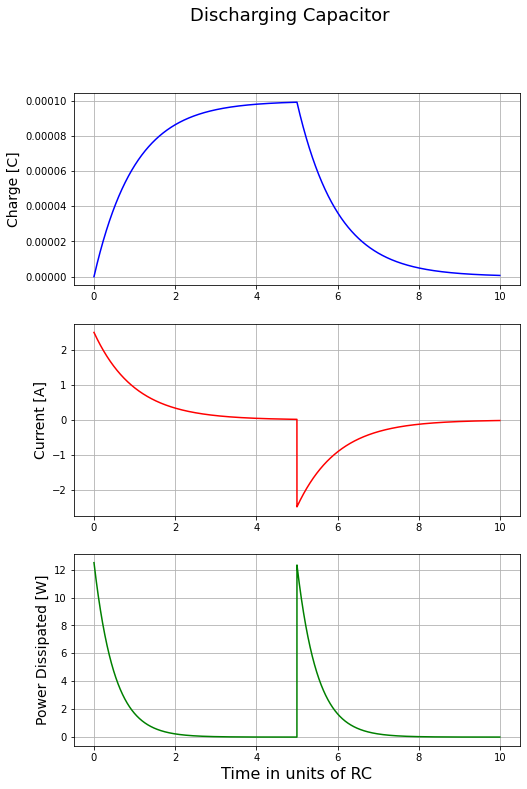

In [18]:
# Plot the behavior in the circuit here
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,12))  

# First calculate the power dissipated by the resistor, the time_rc_units, then plot as before

### BEGIN SOLUTION
axes = [ax1, ax2, ax3]
time_rc_units = np.arange(rcc.num_timesteps * 2) * rcc.dt / rcc.rc_constant
fig.suptitle('Discharging Capacitor', fontsize=18)
yarrays = [rcc.q_vals, rcc.i_vals, 
           power_resistor]
ylabels = ['Charge [C]', 'Current [A]', 'Power Dissipated [W]']
colors = ['b', 'r', 'g']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(time_rc_units, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)
    

ax3.set_xlabel('Time in units of RC', fontsize=16)
### END SOLUTION

### Compare energy budget (2 points)

Calculate the total energy dissipated, `energy_dissipated` and the energy remaining in the capacitor, `energy_capacitor`.  

In [19]:
# Calculate energy budget here
### BEGIN SOLUTION
energy_dissipated = power_resistor.sum() * rcc.dt
energy_capacitor = .5 * rcc.q_now**2 / rcc.capacitance 
### END SOLUTION

In [20]:
"""Execute to check you're on the right track"""
assert(energy_capacitor < 1e-7)

### Comment on your results (2 points)

In the cell below, briefly describe the figure (charge, current, power behavior) as though you were writing a caption.  Also, comment on the energy budget of the system.

Both the charge and current decay exponentially with time. As the capacitor loses charge, the stored energy in the capacitor decreases. The energy from the capacitor converts to thermal energy as current passes through the resistor, which heats up and releases the energy into the air.  After discharging over the time periods, there is almost no energy left in the capacitor.  The resistor has dissipated the same amount of energy as before.